In [1]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('alturas_pesos.csv')
dados.describe()
display(dados)

,sexo,altura,peso
0,M,187.57,109.72
1,M,174.71,73.62
2,M,188.24,96.50
3,M,182.20,99.81
4,M,177.50,93.60
...,...,...,...
9995,F,168.08,62.04
9996,F,170.35,77.51
9997,F,162.22,58.28
9998,F,175.35,74.32


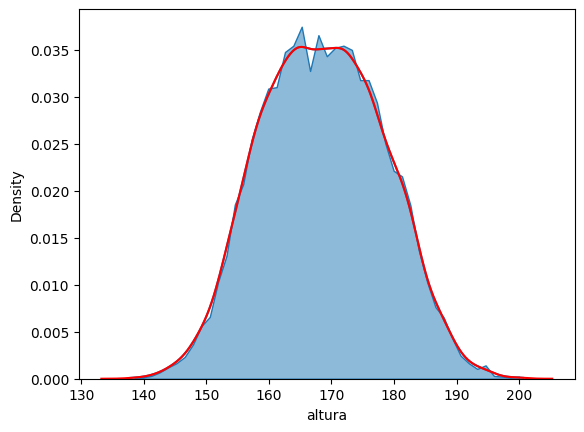

In [3]:

#Maneiras de controlar a cor do kde

#ax = sns.histplot(data=dados, x='altura', kde=True, element='poly', fill=True);
#ax.lines[0].set_color('crimson')

sns.histplot(data=dados, x='altura', kde=True, element='poly', fill=True, stat='density');
sns.kdeplot(data=dados, x='altura', color='red',gridsize = 1000);




In [4]:
separados = {
    'F' : dados.query("sexo == 'F'").copy(),
    'M' : dados.query("sexo == 'M'").copy()
    
}

In [5]:
separados['F']

,sexo,altura,peso
5000,F,149.63,46.31
5001,F,165.68,64.10
5002,F,160.96,59.44
5003,F,163.78,58.14
5004,F,156.95,58.87
...,...,...,...
9995,F,168.08,62.04
9996,F,170.35,77.51
9997,F,162.22,58.28
9998,F,175.35,74.32


In [6]:
dados.groupby('sexo')['altura peso'.split()].agg(['mean', 'median'])

altura               peso       
            mean  median       mean median
sexo                                      
F     161.820188  161.88  61.625692  61.74
M     175.326958  175.33  84.832028  84.84

161.3 168.45 175.7025 200.66


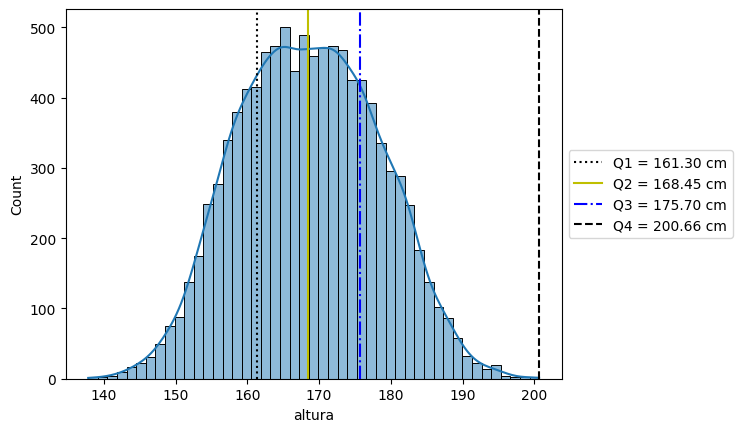

In [38]:
sns.histplot(data=dados,x='altura', kde=True)

q1 = np.quantile(dados['altura'],q = 1/4)
q2 = np.quantile(dados['altura'],q = 2/4)
q3 = np.quantile(dados['altura'],q = 3/4)
q4 = np.quantile(dados['altura'],q = 1)

print(q1,q2,q3,q4)

plt.axvline(x=q1,label=f'Q1 = {q1:.2f} cm', color='k',ls=':')
plt.axvline(x=q2,label=f'Q2 = {q2:.2f} cm', color='y')
plt.axvline(x=q3,label=f'Q3 = {q3:.2f} cm', color='b',ls='-.')
plt.axvline(x=q4,label=f'Q4 = {q4:.2f} cm', color='k',ls='--')
plt.legend(bbox_to_anchor=(1,0.5), loc='center left');


In [8]:
#moda
dados['altura'].mode()

0    160.48
1    164.67
2    164.73
3    169.01
4    172.16
Name: altura, dtype: float64

In [42]:
#10 que mais repetem
dados['altura'].value_counts().iloc[:10]

altura
169.01    10
160.48    10
164.73    10
172.16    10
164.67    10
171.89     9
161.88     9
163.79     9
172.03     9
173.43     9
Name: count, dtype: int64

In [10]:
#transformando em altura de centimetro para metros
dados['altura_metros'] = np.round(dados['altura']/100,2)

In [11]:
dados['altura_metros'].value_counts()

altura_metros
1.64    371
1.62    364
1.65    362
1.71    362
1.73    360
       ... 
1.98      1
2.01      1
2.00      1
1.40      1
1.38      1
Name: count, Length: 64, dtype: int64

In [11]:
dados.describe().loc['min max'.split()]

,altura,peso,altura_metros
min,137.83,29.35,1.38
max,200.66,122.47,2.01


In [47]:
#pega o nome das colunas numéricas.
for var in dados.select_dtypes(include = np.number):
    print(f"Amplitude da {var}: {dados[var].max() - dados[var].min():.2f}")



Amplitude da altura: 62.83
Amplitude da peso: 93.12
Amplitude da altura_metros: 0.63


0       187.57
1       174.71
2       188.24
3       182.20
4       177.50
         ...  
9995    168.08
9996    170.35
9997    162.22
9998    175.35
9999    157.34
Name: altura, Length: 10000, dtype: float64

In [13]:
for col in dados.select_dtypes(include = np.number):
    print(f"Variância da {col}: {dados[col].var():.2f} cm²")


Variância da altura: 95.51 cm²
Variância da peso: 212.12 cm²
Variância da altura_metros: 0.01 cm²


In [14]:
for col in dados.select_dtypes(include = np.number):
    print(f"Desviopadrão da {col}: {dados[col].var():.2f} cm")

Desviopadrão da altura: 95.51 cm
Desviopadrão da peso: 212.12 cm
Desviopadrão da altura_metros: 0.01 cm


In [15]:
# IQR(InterQuartile Range) ampitude de variação, robusta
print (q3 - q1)

14.402499999999975


In [16]:
dados['altura'].skew()

np.float64(0.04937008717355795)

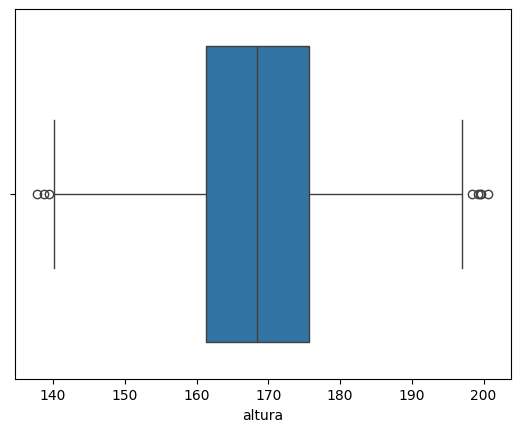

In [17]:
sns.boxplot(data=dados, x='altura');

In [37]:
def calcularQuantiles(dados, n):
    '''
    Função que calcula o quantiles de acordo com um dataframe e quantidade de intervalos desejados

    Parâmetros: 
    dados(DataFrame): tabela de dados
    n(int): número desejado de intervalos

    Retorno: lista contendo os valores correspondentes a cada intervalo 
    '''
    
    return [np.quantile(dados, q=a/n) for a in range(1,1+n)]

def calcularWhiskers(q1,q2):
    '''
    Função que retorna os whiskers de uma determinada base de dados

    parâmetros:
    q1(float): primeiro quantile
    q2(float): terceiro quantile

    retorna lista contendo os whiskers min e max, respectimante na posição 0 e 1
    '''
    return [q1 - (q2-q1) * 1.5, q2 + (q2-q1) * 1.5]

quantiles = calcularQuantiles(separados['F']['altura'],4)
print(calcularWhiskers(quartiles[0],quartiles[2]))


[np.float64(143.23000000000002), np.float64(180.51)]


In [114]:
#achando as outliers de um determinado intervalo
separados['F'][separados['F']['altura'].apply(lambda x: x < whisker_min or x> whisker_max)]

,sexo,altura,peso,z_score_altura
5074,F,142.65,41.19,-2.799170
5103,F,182.86,80.45,3.072167
5345,F,140.55,40.08,-3.105806
5360,F,141.40,31.29,-2.981692
5732,F,142.44,42.86,-2.829834
5740,F,142.52,36.53,-2.818153
6116,F,181.45,79.40,2.866283
6176,F,141.86,47.07,-2.914524
6624,F,138.73,32.38,-3.371557
6625,F,141.58,49.04,-2.955409


In [33]:
# calculando a distância dos dados em relação ao desvio padrão
separados['F']['z_score_altura'] = separados['F']['altura'].apply(lambda x: (x-separados['F']['altura'].mean())/separados['F']['altura'].std())

In [34]:
# apenas os outliers, 3 desvios padrões de diferença da média
separados['F'][separados['F']['z_score_altura'].apply(lambda x: abs(x) > 3)]

,sexo,altura,peso,z_score_altura
5103,F,182.86,80.45,3.072167
5345,F,140.55,40.08,-3.105806
6624,F,138.73,32.38,-3.371557
7162,F,183.97,80.73,3.234246
7294,F,139.38,35.66,-3.276646
7311,F,186.41,86.22,3.590527
7617,F,140.08,40.29,-3.174434
7856,F,183.55,85.47,3.172919
8635,F,183.11,87.33,3.108671
9285,F,137.83,29.35,-3.502972
